# Chapter 4.4 - Overfitting and underfitting

In [1]:
import numpy as np
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
# Getting IMDB data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [3]:
# Vectorizing the sequence
def vectorize_sequences(sequences, dimension = 10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [4]:
# Vectorizing the input datasets
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# Changing types of the to float 32
y_train = np.asarray(train_labels)
y_train = y_train.astype('float32')

y_test = np.asarray(test_labels)
y_test = y_test.astype('float32')

## Defining models

In [6]:
# Keras imports
from keras.models import Sequential
from keras.layers import Dense

In [7]:
# Defining the original model
def build_original_model():
    model = Sequential()
    model.add(Dense(units = 16, 
                    activation = 'relu', 
                    input_shape = (10000,)))
    model.add(Dense(units = 16, 
                    activation = 'relu'))
    model.add(Dense(units = 1, 
                    activation = 'sigmoid'))
    model.compile(optimizer = 'rmsprop',
                       loss = 'binary_crossentropy',
                       metrics = ['acc'])
    return model

In [8]:
# Defining a small model
def build_small_model():
    model = Sequential()
    model.add(Dense(units = 4, 
                    activation = 'relu', 
                    input_shape = (10000,)))
    model.add(Dense(units = 4, 
                    activation = 'relu'))
    model.add(Dense(units = 1, 
                    activation = 'sigmoid'))
    model.compile(optimizer = 'rmsprop',
                       loss = 'binary_crossentropy',
                       metrics = ['acc'])
    return model

In [9]:
# Defining a big model
def build_big_model():
    model = Sequential()
    model.add(Dense(units = 512, 
                    activation = 'relu', 
                    input_shape = (10000,)))
    model.add(Dense(units = 512, 
                    activation = 'relu'))
    model.add(Dense(units = 1, 
                    activation = 'sigmoid'))
    model.compile(optimizer = 'rmsprop',
                       loss = 'binary_crossentropy',
                       metrics = ['acc'])
    return model

In [10]:
# Initializing the original network
original_network = build_original_model()

In [11]:
# Training the original network
original_network_history = original_network.fit(x_train, 
                     y_train,
                     epochs = 20,
                     batch_size = 512,
                     validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s - loss: 0.4617 - acc: 0.8187 - val_loss: 0.3468 - val_acc: 0.8789
Epoch 2/20
25000/25000 [==============================] - 5s - loss: 0.2687 - acc: 0.9069 - val_loss: 0.2910 - val_acc: 0.8880
Epoch 3/20
25000/25000 [==============================] - 7s - loss: 0.2046 - acc: 0.9288 - val_loss: 0.2809 - val_acc: 0.8888
Epoch 4/20
25000/25000 [==============================] - 4s - loss: 0.1725 - acc: 0.9381 - val_loss: 0.2963 - val_acc: 0.8833
Epoch 5/20
25000/25000 [==============================] - 4s - loss: 0.1459 - acc: 0.9484 - val_loss: 0.3102 - val_acc: 0.8799
Epoch 6/20
25000/25000 [==============================] - 4s - loss: 0.1296 - acc: 0.9558 - val_loss: 0.3287 - val_acc: 0.8779
Epoch 7/20
25000/25000 [==============================] - 4s - loss: 0.1154 - acc: 0.9599 - val_loss: 0.3579 - val_acc: 0.8738
Epoch 8/20
25000/25000 [==============================] - 4s 

In [12]:
small_network = build_small_model()

In [13]:
small_network_history = small_network.fit(x_train,  
                                          y_train,
                                          epochs = 20,
                                          batch_size = 512,
                                          validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s - loss: 0.5178 - acc: 0.7892 - val_loss: 0.4157 - val_acc: 0.8693
Epoch 2/20
25000/25000 [==============================] - 4s - loss: 0.3292 - acc: 0.8989 - val_loss: 0.3240 - val_acc: 0.8853
Epoch 3/20
25000/25000 [==============================] - 4s - loss: 0.2468 - acc: 0.9206 - val_loss: 0.2929 - val_acc: 0.8879
Epoch 4/20
25000/25000 [==============================] - 4s - loss: 0.2030 - acc: 0.9337 - val_loss: 0.2824 - val_acc: 0.8887
Epoch 5/20
25000/25000 [==============================] - 4s - loss: 0.1766 - acc: 0.9416 - val_loss: 0.2887 - val_acc: 0.8856
Epoch 6/20
25000/25000 [==============================] - 4s - loss: 0.1563 - acc: 0.9482 - val_loss: 0.2910 - val_acc: 0.8839
Epoch 7/20
25000/25000 [==============================] - 4s - loss: 0.1418 - acc: 0.9534 - val_loss: 0.3010 - val_acc: 0.8819
Epoch 8/20
25000/25000 [==============================] - 4s 

In [14]:
epochs = range(1, 21)
original_val_loss = original_network_history.history['val_loss']
small_model_val_loss = small_network_history.history['val_loss']

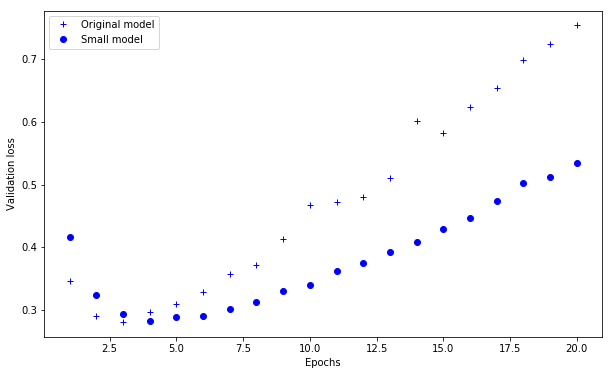

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))

# Plotting the validation loss of the original network
# b+ is for "blue cross"
plt.plot(epochs, 
         original_val_loss, 
         'b+', 
         label='Original model')
# Plotting the validation loss of the small network
# "bo" is for "blue dot"
plt.plot(epochs, 
         small_model_val_loss, 'bo', label='Small model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

### Conclusions

The smaller network overfits later than the bigger network. 
Let's investigate other scenario.